In [131]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import mailbox
import csv
import pandas.plotting
from IPython import display
from ipywidgets import interact, widgets
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
df = pd.read_csv("/content/drive/MyDrive/CIS 690/data/Values_1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/CIS 690/data/Values_2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/CIS 690/data/Values_3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/CIS 690/data/Values_4.csv")
df5 = pd.read_csv("/content/drive/MyDrive/CIS 690/data/Values_5.csv")


In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
df6 = pd.merge(df,df2,on="society_id")
df6

,society_id,code_1,code_label_1,focal_year_1,code_2,code_label_2,focal_year_2
0,Cg2,3,Elite stratification,1100.0,7,Villages/towns,1100.0
1,Ef9,5,Complex stratification,1136.0,7,Villages/towns,1136.0
2,Ej15,5,Complex stratification,1292.0,7,Villages/towns,1292.0
3,Cd11,4,Dual stratification,1500.0,7,Villages/towns,1500.0
4,Nj8,4,Dual stratification,1500.0,7,Villages/towns,1500.0
...,...,...,...,...,...,...,...
1069,Ce5,5,Complex stratification,1960.0,8,Complex permanent,1960.0
1070,Sh8,1,Absence of distinctions,1964.0,3,Semisedentary,1964.0
1071,Ie32,2,Wealth distinctions,1964.0,7,Villages/towns,1964.0
1072,Sd9,1,Absence of distinctions,1965.0,4,Impermanent,1965.0


In [134]:
df7 = pd.merge(df6,df3,on="society_id")
df7

,society_id,code_1,code_label_1,focal_year_1,code_2,code_label_2,focal_year_2,code_3,code_label_3,focal_year_3
0,Cg2,3,Elite stratification,1100.0,7,Villages/towns,1100.0,4,"Active, supporting morality",1100
1,Ef9,5,Complex stratification,1136.0,7,Villages/towns,1136.0,1,Absent,1136
2,Ej15,5,Complex stratification,1292.0,7,Villages/towns,1292.0,2,Otiose,1292
3,Sb8,4,Dual stratification,1520.0,7,Villages/towns,1520.0,2,Otiose,1520
4,Nj2,5,Complex stratification,1520.0,7,Villages/towns,1520.0,3,"Active, but not supporting morality",1520
...,...,...,...,...,...,...,...,...,...,...
715,Sc18,1,Absence of distinctions,1960.0,3,Semisedentary,1960.0,2,Otiose,1960
716,Ej12,4,Dual stratification,1960.0,7,Villages/towns,1960.0,1,Absent,1960
717,Ce5,5,Complex stratification,1960.0,8,Complex permanent,1960.0,4,"Active, supporting morality",1960
718,Sh8,1,Absence of distinctions,1964.0,3,Semisedentary,1964.0,4,"Active, supporting morality",1964


In [135]:
df8 = pd.merge(df7,df4,on="society_id")
df8

,society_id,code_1,code_label_1,focal_year_1,code_2,code_label_2,focal_year_2,code_3,code_label_3,focal_year_3,code_4,code_label_4,focal_year_4
0,Cg2,3,Elite stratification,1100.0,7,Villages/towns,1100.0,4,"Active, supporting morality",1100,7,Small extended,1100.0
1,Ef9,5,Complex stratification,1136.0,7,Villages/towns,1136.0,1,Absent,1136,2,"Nuclear, limited polygyny",1136.0
2,Ej15,5,Complex stratification,1292.0,7,Villages/towns,1292.0,2,Otiose,1292,2,"Nuclear, limited polygyny",1292.0
3,Sb8,4,Dual stratification,1520.0,7,Villages/towns,1520.0,2,Otiose,1520,7,Small extended,1520.0
4,Nj2,5,Complex stratification,1520.0,7,Villages/towns,1520.0,3,"Active, but not supporting morality",1520,2,"Nuclear, limited polygyny",1520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Sc18,1,Absence of distinctions,1960.0,3,Semisedentary,1960.0,2,Otiose,1960,8,Large extended,1960.0
711,Ej12,4,Dual stratification,1960.0,7,Villages/towns,1960.0,1,Absent,1960,6,Minimal extended,1960.0
712,Ce5,5,Complex stratification,1960.0,8,Complex permanent,1960.0,4,"Active, supporting morality",1960,1,"Nuclear, monogamous",1960.0
713,Sh8,1,Absence of distinctions,1964.0,3,Semisedentary,1964.0,4,"Active, supporting morality",1964,7,Small extended,1964.0


In [136]:
df9 = pd.merge(df8,df5,on="society_id")
df9

,society_id,code_1,code_label_1,focal_year_1,code_2,code_label_2,focal_year_2,code_3,code_label_3,focal_year_3,code_4,code_label_4,focal_year_4,code_5,code_label_5,focal_year_5
0,Sb8,4,Dual stratification,1520.0,7,Villages/towns,1520.0,2,Otiose,1520,7,Small extended,1520.0,2,Matrilineal heir,1520.0
1,Nj2,5,Complex stratification,1520.0,7,Villages/towns,1520.0,3,"Active, but not supporting morality",1520,2,"Nuclear, limited polygyny",1520.0,1,Patrilineal heir,1520.0
2,Sf6,4,Dual stratification,1540.0,7,Villages/towns,1540.0,1,Absent,1540,4,"Polygyny, atypical cowives pattern",1540.0,2,Matrilineal heir,1540.0
3,Ng8,4,Dual stratification,1560.0,3,Semisedentary,1560.0,1,Absent,1560,8,Large extended,1560.0,2,Matrilineal heir,1560.0
4,Ni5,1,Absence of distinctions,1570.0,1,Nomadic,1570.0,1,Absent,1570,1,"Nuclear, monogamous",1570.0,7,Nonhered: inf. consensus,1570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Sc18,1,Absence of distinctions,1960.0,3,Semisedentary,1960.0,2,Otiose,1960,8,Large extended,1960.0,2,Matrilineal heir,1960.0
583,Ej12,4,Dual stratification,1960.0,7,Villages/towns,1960.0,1,Absent,1960,6,Minimal extended,1960.0,4,Nonhered: seniority,1960.0
584,Ce5,5,Complex stratification,1960.0,8,Complex permanent,1960.0,4,"Active, supporting morality",1960,1,"Nuclear, monogamous",1960.0,6,Nonhered: election,1960.0
585,Sh8,1,Absence of distinctions,1964.0,3,Semisedentary,1964.0,4,"Active, supporting morality",1964,7,Small extended,1964.0,1,Patrilineal heir,1964.0


In [137]:
df9.drop(['focal_year_2','focal_year_3','focal_year_4','focal_year_5'],axis=1,inplace=True)

In [138]:
df9

,society_id,code_1,code_label_1,focal_year_1,code_2,code_label_2,code_3,code_label_3,code_4,code_label_4,code_5,code_label_5
0,Sb8,4,Dual stratification,1520.0,7,Villages/towns,2,Otiose,7,Small extended,2,Matrilineal heir
1,Nj2,5,Complex stratification,1520.0,7,Villages/towns,3,"Active, but not supporting morality",2,"Nuclear, limited polygyny",1,Patrilineal heir
2,Sf6,4,Dual stratification,1540.0,7,Villages/towns,1,Absent,4,"Polygyny, atypical cowives pattern",2,Matrilineal heir
3,Ng8,4,Dual stratification,1560.0,3,Semisedentary,1,Absent,8,Large extended,2,Matrilineal heir
4,Ni5,1,Absence of distinctions,1570.0,1,Nomadic,1,Absent,1,"Nuclear, monogamous",7,Nonhered: inf. consensus
...,...,...,...,...,...,...,...,...,...,...,...,...
582,Sc18,1,Absence of distinctions,1960.0,3,Semisedentary,2,Otiose,8,Large extended,2,Matrilineal heir
583,Ej12,4,Dual stratification,1960.0,7,Villages/towns,1,Absent,6,Minimal extended,4,Nonhered: seniority
584,Ce5,5,Complex stratification,1960.0,8,Complex permanent,4,"Active, supporting morality",1,"Nuclear, monogamous",6,Nonhered: election
585,Sh8,1,Absence of distinctions,1964.0,3,Semisedentary,4,"Active, supporting morality",7,Small extended,1,Patrilineal heir


In [139]:
x = pd.DataFrame(df9.code_label_1.value_counts())
x

,code_label_1
Absence of distinctions,250
Wealth distinctions,141
Dual stratification,124
Complex stratification,54
Elite stratification,18


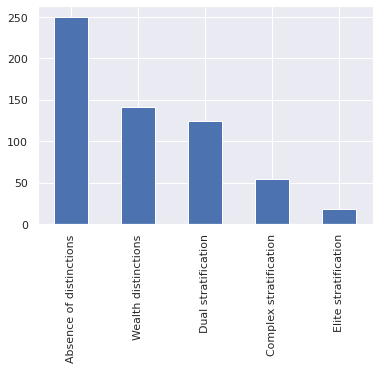

In [140]:
df9['code_label_1'].value_counts().plot(kind='bar')

In [141]:
neighborhood = df9.code_label_1.unique()
neighborhood.sort()

In [142]:
len(neighborhood)

5

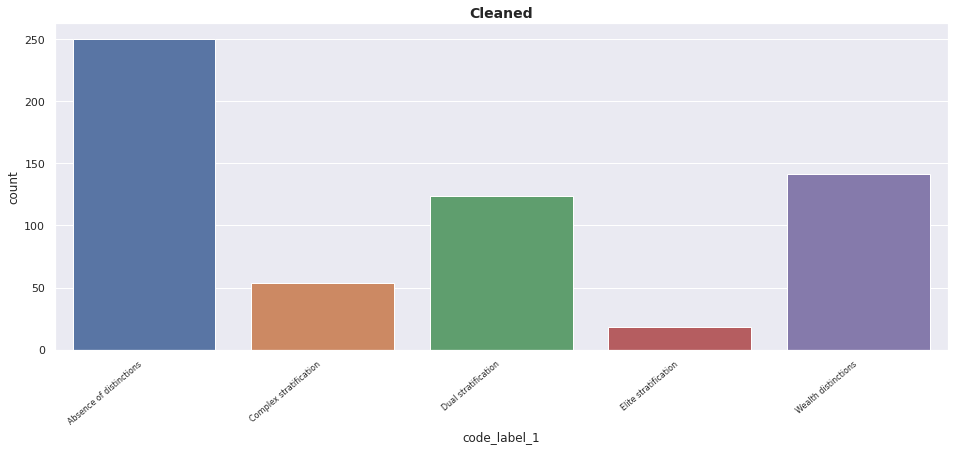

In [143]:

plt.figure(figsize=(16,6))
ax = sns.countplot(x='code_label_1', data=df9, order=neighborhood)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Cleaned', fontsize=14, fontweight='bold')
plt.show()

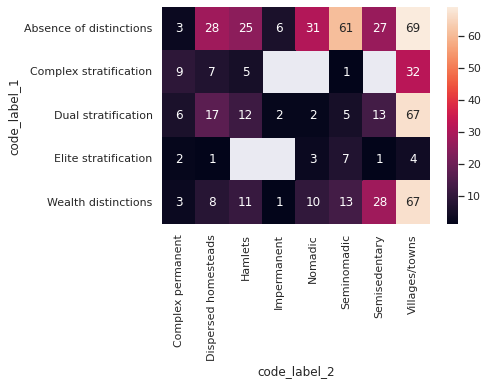

In [144]:
df_heatmap = df9.pivot_table(values='code_3',index='code_label_1',columns='code_label_2',aggfunc='count')
sns.heatmap(df_heatmap,annot=True)
plt.show()


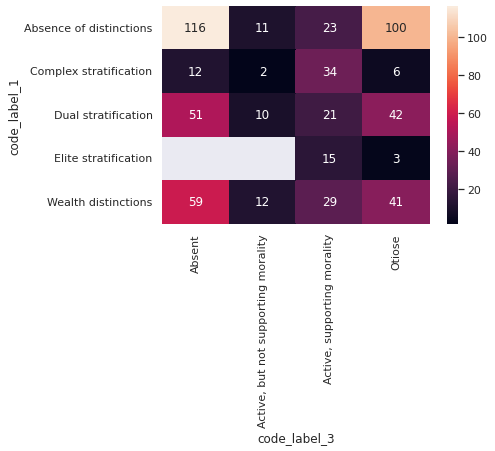

In [145]:
df_heatmap2 = df9.pivot_table(values='code_1', index='code_label_1',columns='code_label_3',aggfunc='count')
sns.heatmap(df_heatmap2,annot=True, fmt='g')
plt.show()

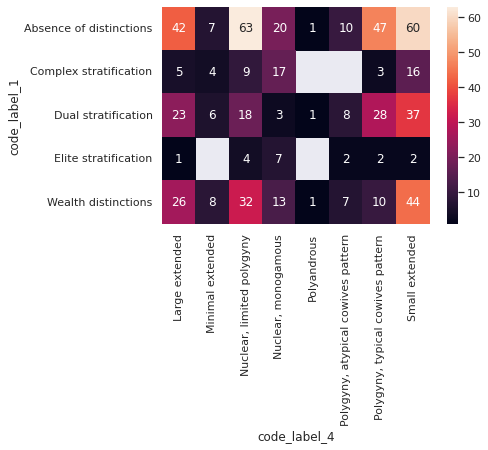

In [146]:
df_heatmap2 = df9.pivot_table(values='code_1', index='code_label_1',columns='code_label_4',aggfunc='count')
sns.heatmap(df_heatmap2,annot=True, fmt='g')
plt.show()

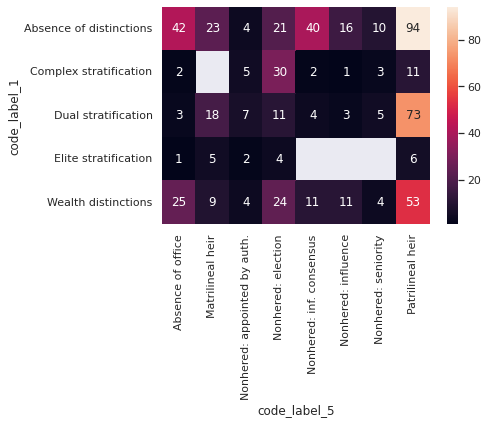

In [147]:
df_heatmap2 = df9.pivot_table(values='code_1', index='code_label_1',columns='code_label_5',aggfunc='count')
sns.heatmap(df_heatmap2,annot=True, fmt='g')
plt.show()

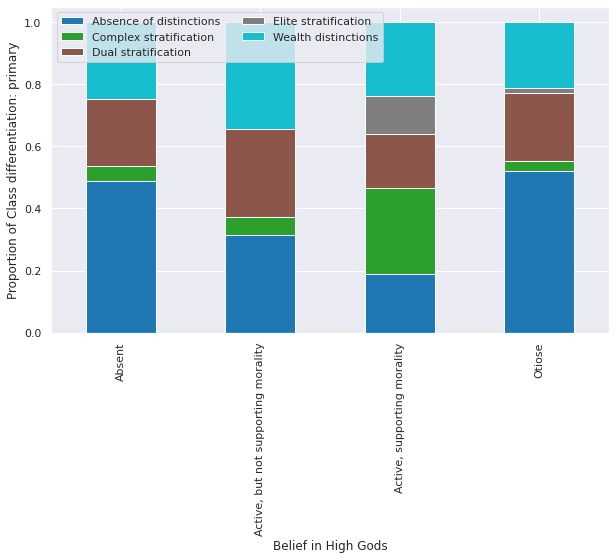

In [152]:
cross_tab_prop = pd.crosstab(index=df9['code_label_3'],
                             columns=df9['code_label_1'],
                             normalize="index")

cross_tab = pd.crosstab(index=df9['code_label_1'],
                        columns=df9['code_label_3'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Belief in High Gods")
plt.ylabel("Proportion of Class differentiation: primary")



plt.show()

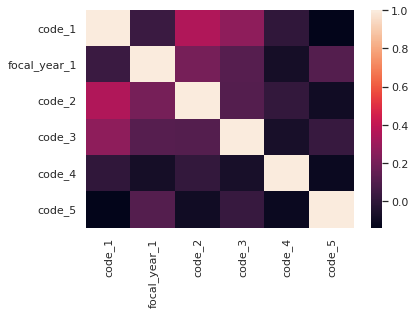

In [105]:
# plotting correlation heatmap
dataplot=sns.heatmap(df9.corr())
  
# displaying heatmap
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1920.0

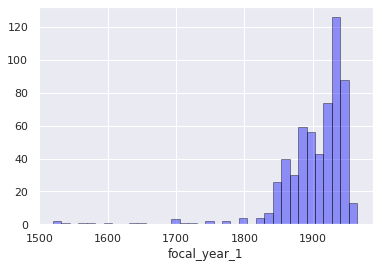

In [106]:
plt = sns.distplot(df9['focal_year_1'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})
df9['focal_year_1'].median()

In [107]:
df9["code_label_1"].value_counts()

Absence of distinctions    250
Wealth distinctions        141
Dual stratification        124
Complex stratification      54
Elite stratification        18
Name: code_label_1, dtype: int64

In [108]:
pd.get_dummies(df9, columns=["code_label_1"]).head()

,society_id,code_1,focal_year_1,code_2,code_label_2,code_3,code_label_3,code_4,code_label_4,code_5,code_label_5,code_label_1_Absence of distinctions,code_label_1_Complex stratification,code_label_1_Dual stratification,code_label_1_Elite stratification,code_label_1_Wealth distinctions
0,Sb8,4,1520.0,7,Villages/towns,2,Otiose,7,Small extended,2,Matrilineal heir,0,0,1,0,0
1,Nj2,5,1520.0,7,Villages/towns,3,"Active, but not supporting morality",2,"Nuclear, limited polygyny",1,Patrilineal heir,0,1,0,0,0
2,Sf6,4,1540.0,7,Villages/towns,1,Absent,4,"Polygyny, atypical cowives pattern",2,Matrilineal heir,0,0,1,0,0
3,Ng8,4,1560.0,3,Semisedentary,1,Absent,8,Large extended,2,Matrilineal heir,0,0,1,0,0
4,Ni5,1,1570.0,1,Nomadic,1,Absent,1,"Nuclear, monogamous",7,Nonhered: inf. consensus,1,0,0,0,0


In [109]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df9["code"] = ord_enc.fit_transform(df9[["code_label_1"]])
df9[["code_label_1", "code"]].head(11)

,code_label_1,code
0,Dual stratification,2.0
1,Complex stratification,1.0
2,Dual stratification,2.0
3,Dual stratification,2.0
4,Absence of distinctions,0.0
5,Wealth distinctions,4.0
6,Wealth distinctions,4.0
7,Absence of distinctions,0.0
8,Absence of distinctions,0.0
9,Absence of distinctions,0.0


In [110]:
df9.to_csv('cleaned.csv')

In [111]:
dt.to_csv('C:/Users/abc/Desktop/file_name.csv')

NameError: ignored

In [ ]:
df9.drop(['focal_year_1'],axis=1,inplace=True)

In [ ]:
df9.drop(['code'],axis=1,inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df9.corr(), center=0, cmap='magma',annot=True)
ax.set_title('Multi-Collinearity of Code Attributes')

In [ ]:
plt.scatter(df9['code_label_1'],df9['code_label_2'])
plt.show()

In [ ]:
x=df9.copy()

In [ ]:
kmeans=KMeans(2)
kmeans.fit(x)